In [1]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from tools import *
from fit_funcs import *
from entropy import *
import costfun.costfun as cost
import utils.figures as fig_help
from RandomMatrixTheory import goe
import utils.tools as tools

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

linestyle_ls = ['-','--',':', '-.']
linestyle = itertools.cycle(linestyle_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists


config_disorder = 0
config_disorder_sorted = 0

if config_disorder and config_disorder_sorted:
    base_dir = "../results_conf_dis_sort/"
elif config_disorder:
    base_dir = "../results_conf_dis/"
else:
    base_dir = "../results/"

print(base_dir[2:])

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

/Users/rafal.swietek/Projects/CODES/QHamSolver/QuantumSun/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
/results/


## MULTIFRACTALITY

In [10]:
L_total=15

J=3
alfa=1.0
h=1.0
w=0.5
zeta=0.2
N=3
gamma=1.0
ini_ave=1
L = L_total - N

scaled_disorder = 0

alfa_vals = np.array( [*np.linspace(0.2, 0.6, 9), *np.linspace(0.65, 0.94, 30)] )
alfa_vals = np.linspace(0.65, 0.94, 30)
print(alfa_vals)

sizes = np.arange(8, 17, 1)

qs = np.array([0.5, 1.0, 1.5, 2.0, 3.0])

for J in [1, 2]:
    for ii_nu, nu in enumerate([500, 0.1, 0.5, 1.0]):
    
        frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

        folder_base = f'./multifractality/'
        folder = folder_base + base_dir[3:] + f"nu={nu}/"
        os.makedirs(folder_base, exist_ok=True)
        os.makedirs(folder, exist_ok=True)

        for L_total in sizes:
            sub_sizes = np.arange(0, L_total+1)
            L = L_total - N
            name_out = folder + "_L=%g,N=%g,J=%g,w=%g.hdf5"%(L, N, J, w)
            
            pr       = np.zeros((qs.size, alfa_vals.size));                  pr.fill(np.nan)
            Sinfo    = np.zeros((qs.size, alfa_vals.size));                  Sinfo.fill(np.nan)
            for ii, alfa in enumerate(alfa_vals):
                name = base_dir + 'MultiFractality/ParticipationRatio/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ini_ave=ini_ave, ext='.hdf5', scaled_disorder=scaled_disorder)
                
                if exists(name):
                    with h5py.File(name, "r") as file:
                            energies = np.array(file.get('mean energies'))
                            qs = np.array(file.get('qs'))
                            
                            pr[:, ii] = np.array(file.get('pr'))[ii_nu]
                            Sinfo[:, ii] = np.array(file.get('info'))[ii_nu]
                            
                else:
                    print(name)

            print("SAVED:", name_out)
            # print(LA, entropy[LA])
            hf = h5py.File(name_out, 'w')
            hf.create_dataset('interaction', alfa_vals.shape, data = alfa_vals)
            hf.create_dataset('qs',          qs.shape,        data = qs)
            hf.create_dataset('pr',          pr.shape,        data = pr)
            hf.create_dataset('info',        Sinfo.shape,     data = Sinfo)
            hf.close()

[0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94]
SAVED: ./multifractality/results/nu=500/_L=5,N=3,J=1,w=0.5.hdf5
SAVED: ./multifractality/results/nu=500/_L=6,N=3,J=1,w=0.5.hdf5
SAVED: ./multifractality/results/nu=500/_L=7,N=3,J=1,w=0.5.hdf5
SAVED: ./multifractality/results/nu=500/_L=8,N=3,J=1,w=0.5.hdf5
SAVED: ./multifractality/results/nu=500/_L=9,N=3,J=1,w=0.5.hdf5
SAVED: ./multifractality/results/nu=500/_L=10,N=3,J=1,w=0.5.hdf5
SAVED: ./multifractality/results/nu=500/_L=11,N=3,J=1,w=0.5.hdf5
SAVED: ./multifractality/results/nu=500/_L=12,N=3,J=1,w=0.5.hdf5
../results/MultiFractality/ParticipationRatio/_L=13,N=3,J=1,g=1,zeta=0.2,alfa=0.65,h=1,w=0.5,ini_ave.hdf5
../results/MultiFractality/ParticipationRatio/_L=13,N=3,J=1,g=1,zeta=0.2,alfa=0.66,h=1,w=0.5,ini_ave.hdf5
../results/MultiFractality/ParticipationRatio/_L=13,N=3,J=1,g=1,zeta=0.2,alfa=0.67,h=1,w=0.5,ini_ave.hdf5
../results/Mu

## ENTROPY

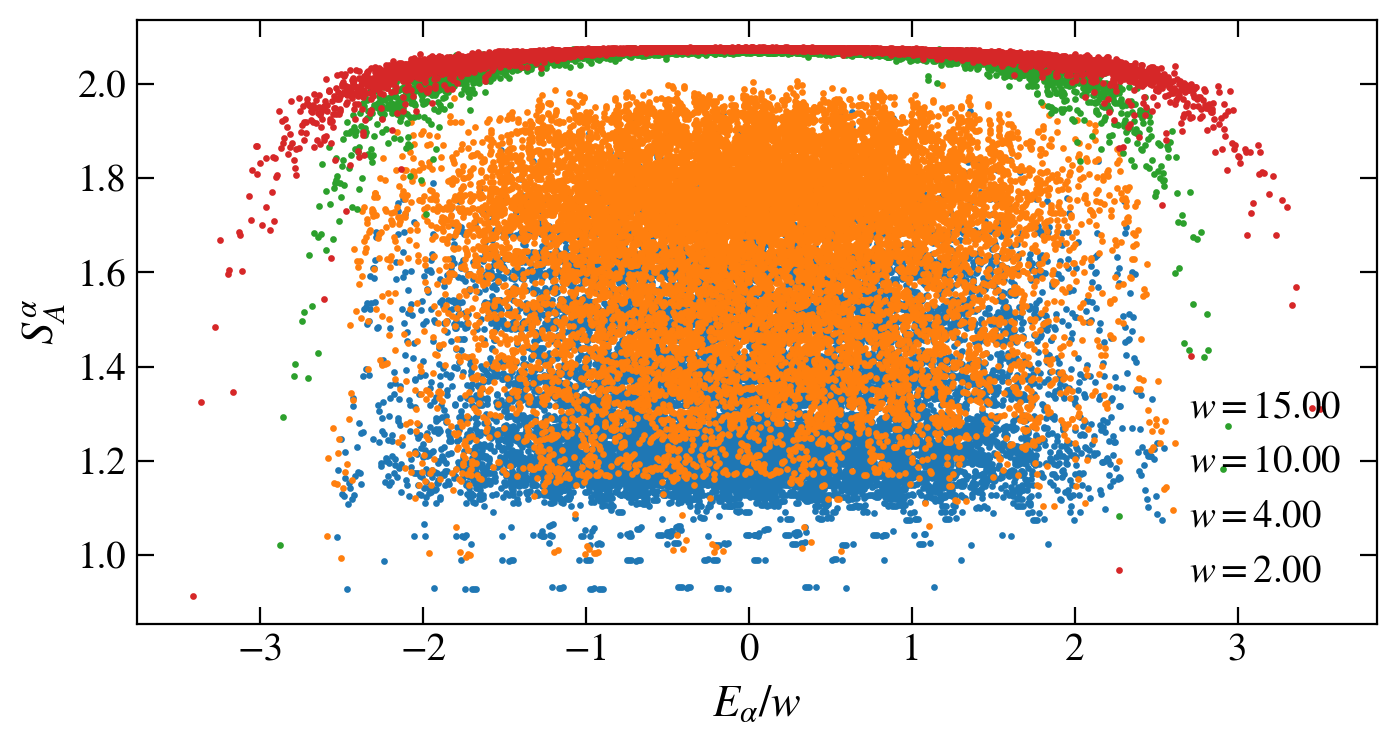

In [10]:

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(8,4), dpi = 200)

L_total=14
N=5

J=1.0
alfa=1.0
h=0.0
w=2.0
zeta=0.0
gamma=1.0
ini_ave=0
L = L_total - N
LA = L_total - 3

for w in [15, 10, 4, 2]:
    name = base_dir + 'Entropy/Eigenstate/realisation=0/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5')
    if exists(name):
        with h5py.File(name, "r") as file:
            energies = np.array(file.get('energies'))
            entropies = np.array(file.get('entropy'))[L_total - LA]
            axis.scatter(energies / w, entropies, s=2, label=r"$w=%.2f$"%w)
    else:
        print(name)


fig_help.set_plot_elements(axis, ylabel=r"$S_A^\alpha$", xlabel=r"$E_\alpha/w$", font_size=14, set_legend=True)

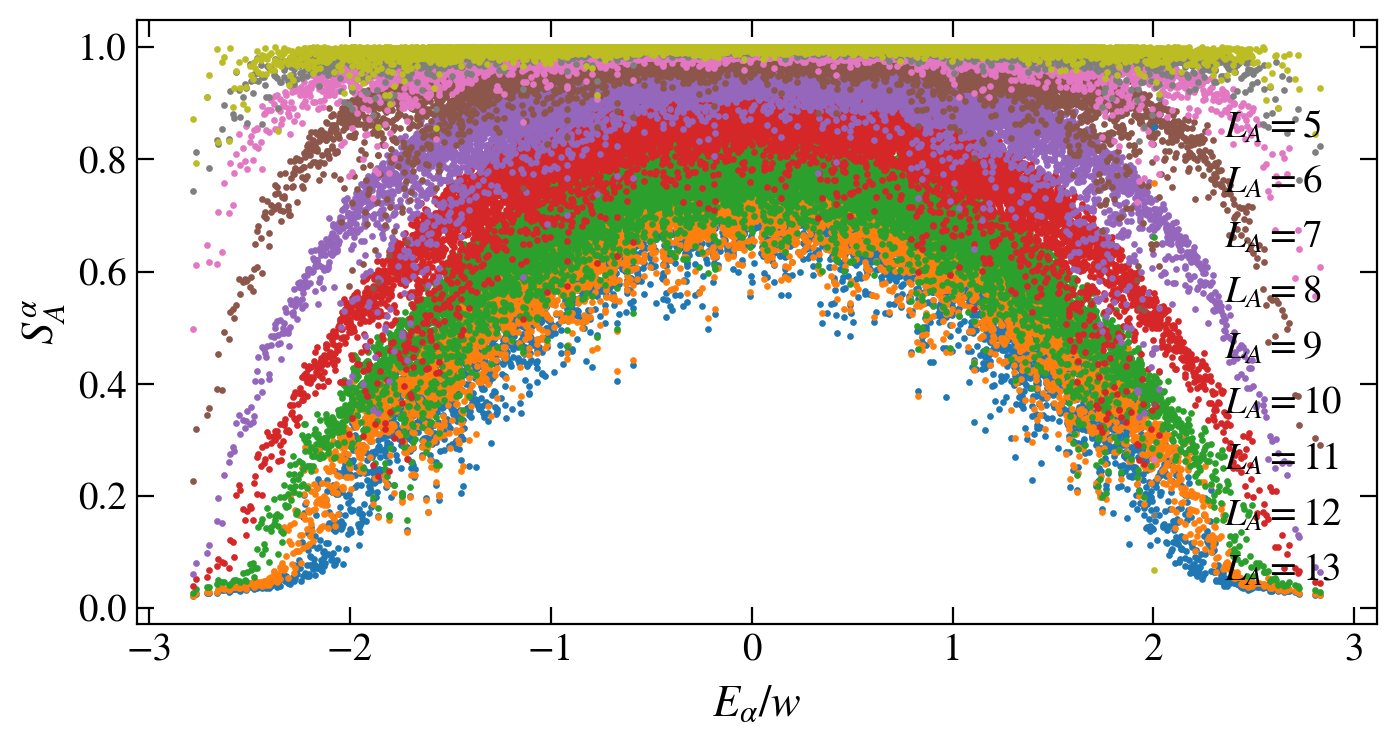

In [16]:

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(8,4), dpi = 200)

L_total=14
N=5

J=1.0
alfa=1.0
h=0.0
w=5.0
zeta=0.0
gamma=1.0
ini_ave=0
L = L_total - N
LA = L_total - 3

for LA in np.arange(N, L_total):
    name = base_dir + 'Entropy/Eigenstate/realisation=0/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5')
    if exists(name):
        with h5py.File(name, "r") as file:
            energies = np.array(file.get('energies'))
            entropies = np.array(file.get('entropy'))[L_total - LA] / page(LA, L_total - LA)
            axis.scatter(energies / w, entropies, s=2, label=r"$L_A=%g$"%LA)
    else:
        print(name)


fig_help.set_plot_elements(axis, ylabel=r"$S_A^\alpha$", xlabel=r"$E_\alpha/w$", font_size=14, set_legend=True)

## POLFED

L Nev dim sigma delta K0 N


NameError: name 'BOUNDARY_COND' is not defined

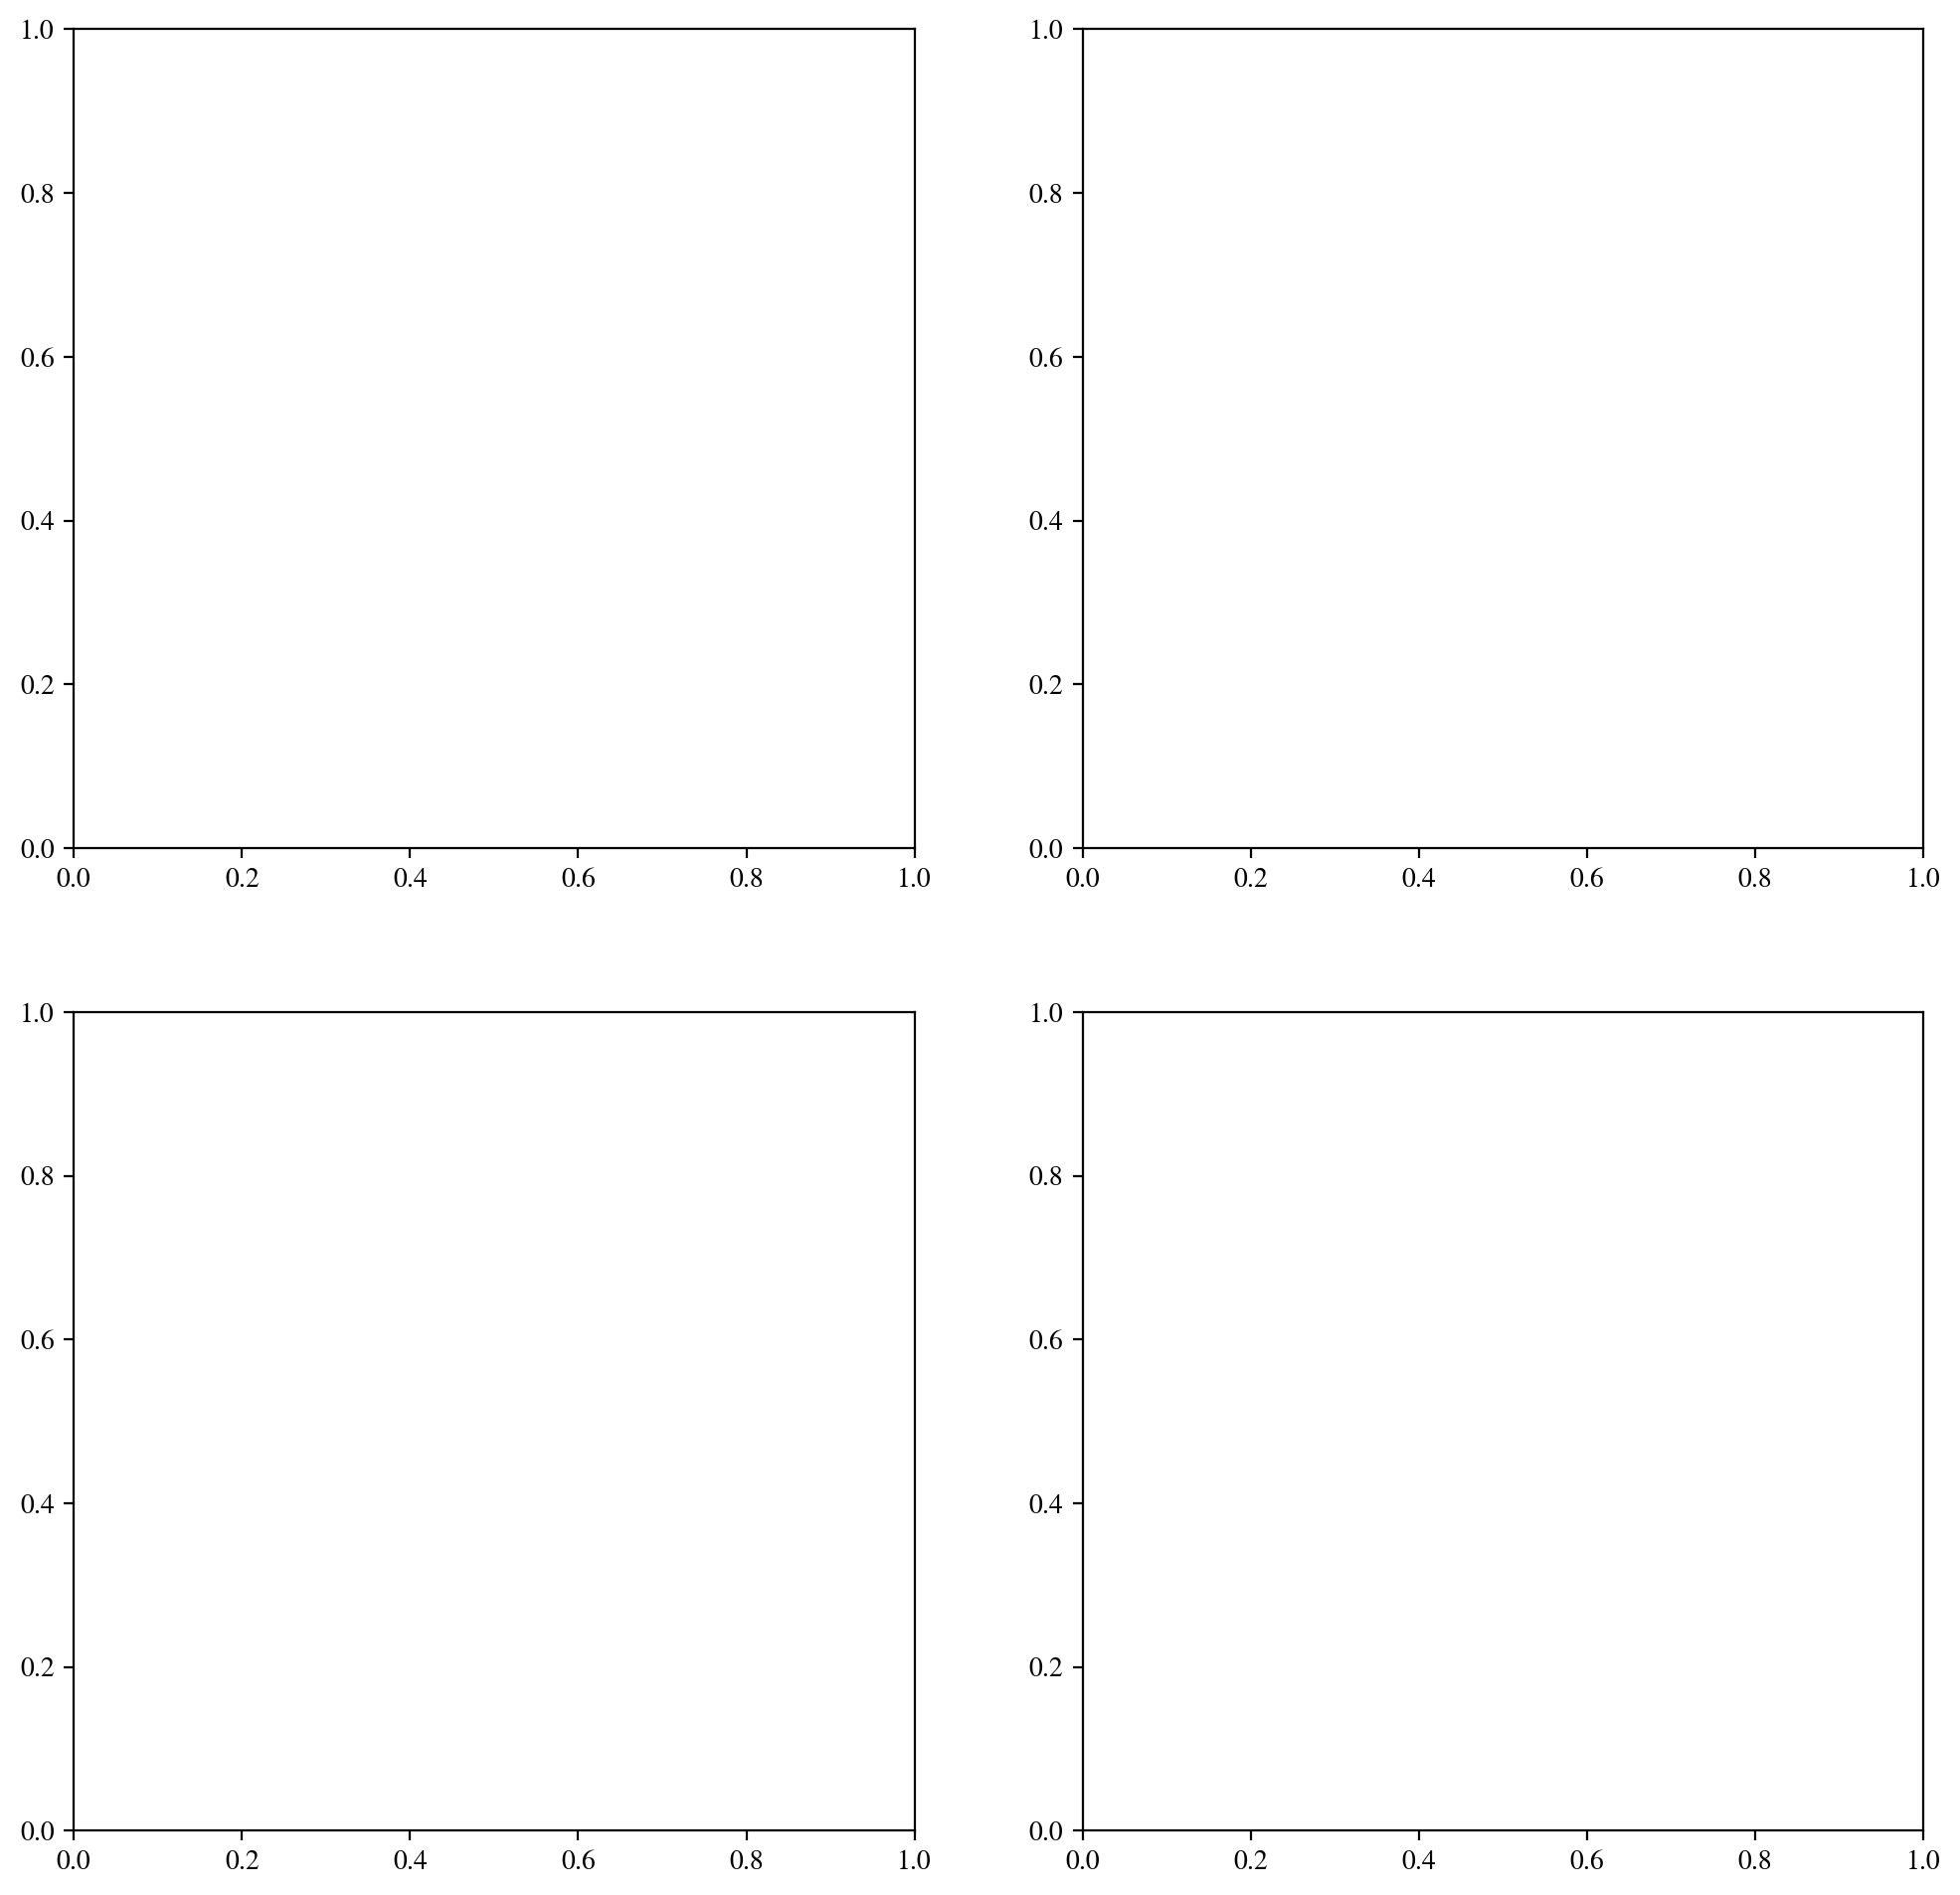

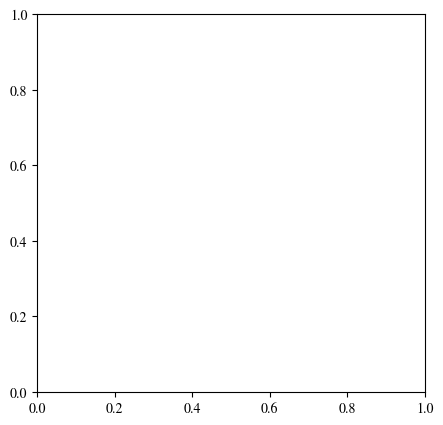

In [28]:
fig, axis = plt.subplots( nrows=2, ncols=2, figsize=(12, 12), dpi = 200)#, sharex=True)
fig, axis_example = plt.subplots( nrows=1, ncols=1, figsize=(5, 5), dpi = 100)#, sharex=True)
axis = np.array(axis).flatten()

L=18
J1=1.0
d1=0.2
e1=0.2

ks=0
ps=1
zxs=-1
zzs=-1

K = 15
sigma = 0.

def coeff(n, sigma):
    val = int(n == 0)
    return np.sqrt(4 - 3 * val) * np.cos(n * np.arccos(sigma))

def chebyshev(n, x):
    if n == 0:      return 1
    elif n == 1:    return x
    else:           return 2 * x * chebyshev(n-1, x) - chebyshev(n-2, x)

def clenshaw_recursive(Nmax, n, x, sigma):
    if n > Nmax: return 0
    else:        return coeff(n, sigma) + 2 * x * clenshaw_recursive(Nmax, n+1, x, sigma) - clenshaw_recursive(Nmax, n+2, x, sigma)

def clenshaw(Nmax, x, sigma):
    # return coeff(0, sigma) + x * clenshaw_recursive(Nmax, 1, x, sigma) - clenshaw_recursive(Nmax, 2, x, sigma)
    # return (coeff(0, sigma) + clenshaw_recursive(Nmax, 0, x, sigma) - clenshaw_recursive(Nmax, 2, x, sigma)) / 2
    bk_2 = 0
    bk_1 = 0
    bk = 0
    res = coeff(0, sigma)
    for n in np.arange(Nmax, 0, -1):
        bk = coeff(n, sigma) + 2.0 * x * bk_1 - bk_2
        bk_2 = bk_1
        bk_1 = bk
        # if n == 1: res += x * bk
        # if n == 2: res -= bk
    # return res
    return coeff(0, sigma) + x * bk_1 - bk_2

def clenshaw_matrix(Nmax, x, sigma):
    # return coeff(0, sigma) + x * clenshaw_recursive(Nmax, 1, x, sigma) - clenshaw_recursive(Nmax, 2, x, sigma)
    # return (coeff(0, sigma) + clenshaw_recursive(Nmax, 0, x, sigma) - clenshaw_recursive(Nmax, 2, x, sigma)) / 2
    bk_2 = np.zeros(x.shape)
    bk_1 = np.zeros(x.shape)
    res = coeff(0, sigma) * np.eye(x.shape[0], x.shape[1])
    for n in np.arange(Nmax, 0, -1):
        bk = coeff(n, sigma) * np.eye(x.shape[0], x.shape[1]) + 2.0 * np.matmul(bk, x) - bk_1
        bk_1 = bk
        # bk_2 = bk_1
        # bk_1 = bk
    #     if n == 1: res += np.matmul(bk, x)
    #     if n == 2: res -= bk
    # return res
    return res + np.matmul(bk_2, x) - bk_1
# print(np.arange(10, -1, -1))


p=0.25
Nev=1000

print("L", "Nev", "dim", "sigma", "delta", "K0", "N")
for ii, L in enumerate([16, 18, 20, 22]):
    name =  f"../../../QHamSolver/XXZ/results/symmetries/{BOUNDARY_COND}/DiagonalMatrixElements/" + info_xxz_sym(L=L, J1=J1, delta1=0.55, k=ks, p=ps, zx=zxs, BOUNDARY_COND=BOUNDARY_COND) + ".hdf5" 
    # name =  f"../../../QHamSolver/XYZ/results/symmetries/{BOUNDARY_COND}/DiagonalMatrixElements/" + info_sym(L=L, J1=J1, delta1=d1, eta1=e1, k=ks, p=ps, zx=zxs, zz=zzs, BOUNDARY_COND=BOUNDARY_COND) + ".hdf5" 
    
    if exists(name):
        with h5py.File(name, "r") as file:
            energies = np.array(file.get('energies')[0])
            dim = energies.size
            if Nev > 0.75 * dim:    Nev2 = 0.75 * dim
            else:                   Nev2 = Nev
            # print(energies[0])
            # H = (np.array(file.get('hamiltonian')))
            # H = 2 * H - (energies[0] + energies[-1]) * np.eye(H.shape[0], H.shape[1])
            # H = H / (energies[-1] - energies[0])

            DOS = dim * (energies[-1] - energies[0]) / 2 / np.sqrt(np.var(energies)) / np.sqrt(2.0 * np.pi)
            delta = Nev2 / ( 2 * DOS )

            # delta = np.sqrt(2) * np.sqrt( np.var(energies) ) * erfinv(Nev / (dim *(energies[-1] - energies[0]) ) )
            
            energies = (2 * energies - (energies[0] + energies[-1])) / (energies[-1] - energies[0])
            sigma = np.mean(energies)
            
            # print(energies[0], energies[-1])
            # hist, edges = np.histogram(energies, bins=30, normed=True)


            K0 = 10
            while True:
                pampam = clenshaw(K0, sigma + delta, sigma) / clenshaw(K0, sigma, sigma)
                if pampam < p:  
                    K0 -= 6;
                    # print("aaa", L, K0, (E[E > p]).size, pampam)
                    break
                else:
                    K0 += 3
                # D = clenshaw(K0, sigma, sigma)
                # E = clenshaw(K0, energies, sigma) / D
                # print("aaa", L, K0, (E[E > p]).size, pampam)
            # K0=L
            # for ij, K in enumerate([11, 21, 31, 41]):
            for ij, K in enumerate([K0]):
    
                # axis[ii].stairs(hist, edges, color='red')

                D = clenshaw(K, sigma, sigma)
                E = clenshaw(K, energies, sigma) / D
                axis[ii].scatter(energies, E, s=10, zorder=2, label=r"$P^K_\sigma(E)$")

                indices = np.where(np.abs(energies - sigma) < delta)
                N_found = np.array(indices).size
                
                print(L, Nev2, dim, sigma, delta, K0, N_found, max(E))
                axis[ii].scatter(energies[indices], E[indices], s=10, zorder=5, color='red')

                if L == 16:
                    axis_example.scatter(energies, E, s=10, zorder=2)
                    axis_example.scatter(energies[indices], E[indices], s=10, zorder=5, color='red')

                # permut = np.argsort(E)
                # permut_inv = np.argsort(permut)

                # H2 = clenshaw_matrix(K, H, sigma)
                # H2 /= D

                # E2 = np.linalg.eigvalsh(H2)
                # # print(E2 - np.sort(E))
                # axis[ii].scatter(energies, E2[permut_inv], s=2, zorder=3, label=r"$P^K_\sigma(\hat{H})\rightarrow E$")
                
                for ax in ( [axis[ii], axis_example] if L==16 else [axis[ii]]):
                    x = np.linspace(-1, 1, 10000)
                    # E = np.sum([coeff(n, sigma) * chebyshev(n, x) for n in np.arange(0, K+1)]) / D
                    E = clenshaw(K, x, sigma) / D
                    ax.plot((x), E, ls='-', c='k', lw=1, zorder=1)
                    ax.axvspan(xmin = sigma - delta, xmax = sigma + delta, color='gray', alpha=0.5)

                    # axis[ii].set_ylim(-.3, 1.1)
                    
                    ax.axhline(y=p, ls='--', c='k')
                    ax.axvline(x=sigma, ls='-', c='k')
                    # axis[ii].set_xlim( max(-1.0, sigma - 5*delta), min(sigma + 5*delta, 1.0) )
                    ax.set_xlim(-1, 1)
                    # ax.set_ylim(0.999, 1.001)
                fig_help.set_plot_elements(axis[ii], ylabel=r"$P^{K=%d}_\sigma(\epsilon)$"%K, xlabel=r"$\epsilon$", font_size=14, set_legend=True, xscale='linear')
                fig_help.set_plot_elements(axis_example, ylabel=r"$P^{K}_\sigma(\epsilon)$", xlabel=r"$\epsilon$", font_size=14, set_legend=True, xscale='linear')
                axis[ii].annotate(r"$D=%d$"%dim + f"\n" + r"$N_{ev}=%d$"%(N_found) + f"\n" + r"$K=%d$"%(K), fontsize=14, xy=(0.05, 0.85), xycoords='axes fraction')
    else:
        print(name)


fig.subplots_adjust(wspace = 0.2, hspace=0.2)

204 [ 2.77555756e-16  0.00000000e+00  3.33066907e-16  6.10622664e-16
  4.71844785e-16  8.32667268e-16  4.99600361e-16  6.38378239e-16
 -9.43689571e-16 -8.60422844e-16 -4.44089210e-16  9.43689571e-16
 -1.38777878e-16  2.49800181e-16 -2.49800181e-16 -6.38378239e-16
  3.05311332e-16  7.49400542e-16  8.32667268e-17 -8.32667268e-16
  0.00000000e+00  4.99600361e-16 -3.05311332e-16 -7.21644966e-16
 -8.04911693e-16 -3.60822483e-16 -1.38777878e-16 -3.05311332e-16
  1.11022302e-16  2.49800181e-16 -2.08166817e-16 -4.16333634e-17
 -4.16333634e-16 -1.38777878e-16  4.71844785e-16  1.66533454e-16
  1.38777878e-16 -5.55111512e-17 -1.94289029e-16  4.16333634e-17
 -3.74700271e-16 -5.55111512e-17  2.35922393e-16 -1.94289029e-16
 -3.74700271e-16 -4.99600361e-16 -3.74700271e-16 -2.77555756e-17
 -5.55111512e-17 -1.24900090e-16 -6.38378239e-16  1.38777878e-17
 -1.24900090e-16 -1.24900090e-16 -1.38777878e-17 -1.66533454e-16
 -6.93889390e-17 -1.38777878e-16 -4.85722573e-17  6.24500451e-17
  2.77555756e-16  6.9

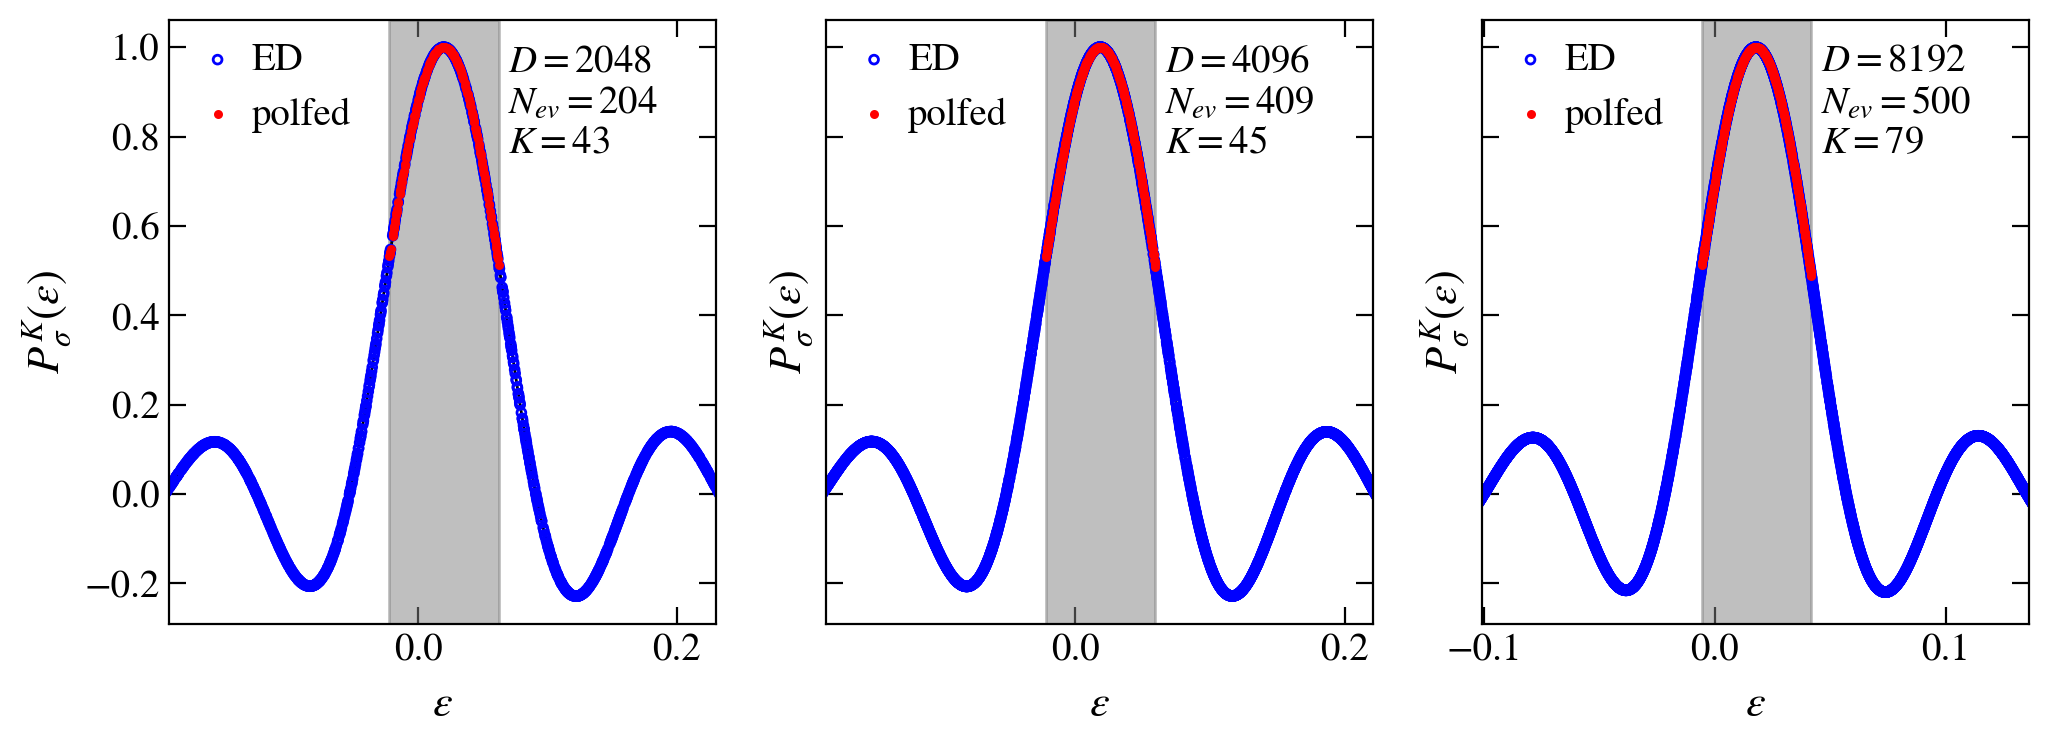

In [34]:
fig, axis = plt.subplots( nrows=1, ncols=3, figsize=(12, 4), dpi = 200, sharey=True)
for ii, L in enumerate([11, 12, 13]):
    name =  f"../../../QHamSolver/QuantumSun/_D=%d.hdf5"%(2**L)
    
    if exists(name):
        with h5py.File(name, "r") as file:
            Efull = np.array(file.get('full')[0])
            dim = Efull.size
            
            # print(L, np.mean(Efull), (2*np.mean(Efull) - (Efull[-1] + Efull[0])) / (Efull[-1] - Efull[0]))
            
            Escaled = np.array(file.get('scaled')[0])
            E = np.array(file.get('polfed')[0])
            Nev = np.array(file.get('params'))[0,0]
            K = np.array(file.get('params'))[0,1]
            sigma = np.array(file.get('params'))[0,2]
            
            D = clenshaw(K, sigma, sigma)
            P_E = clenshaw(K, Escaled, sigma) / D
            axis[ii].scatter(Escaled, P_E, zorder=2, color='blue', facecolor='None', s=10, label="ED")
            

            idxx = min(range(len(Efull)), key=lambda i: abs(Efull[i] - np.min(E)))
            print(E.size, Efull[idxx : idxx + E.size] - np.sort(E))

            E = (2 * E - (Efull[0] + Efull[-1])) / (Efull[-1] - Efull[0])
            E = np.sort(E)
            P_E = clenshaw(K, E, sigma) / D
            axis[ii].scatter(E, P_E, zorder=5, color='red', s=5, label="polfed")


            x = np.linspace(-1, 1, 10000) 
            P_E = clenshaw(K, x, sigma) / D
            axis[ii].plot((x), P_E, ls='-', c='k', lw=1, zorder=1)
            axis[ii].axvspan(xmin = min(E), xmax = max(E), color='gray', alpha=0.5)
            delt = 5 * (max(E) - min(E))
            axis[ii].set_xlim(np.mean(Escaled) - delt/2, np.mean(Escaled) + delt/2)
            
            axis[ii].annotate(r"$D=%d$"%dim + f"\n" + r"$N_{ev}=%d$"%(E.size) + f"\n" + r"$K=%d$"%(K), fontsize=14, xy=(0.62, 0.78), xycoords='axes fraction')
            fig_help.set_plot_elements(axis[ii], ylabel=r"$P^{K}_\sigma(\epsilon)$"%K, xlabel=r"$\epsilon$", font_size=14, set_legend=False, xscale='linear')
            fig_help.set_legend(axis[ii], fontsize=14, loc='upper left')


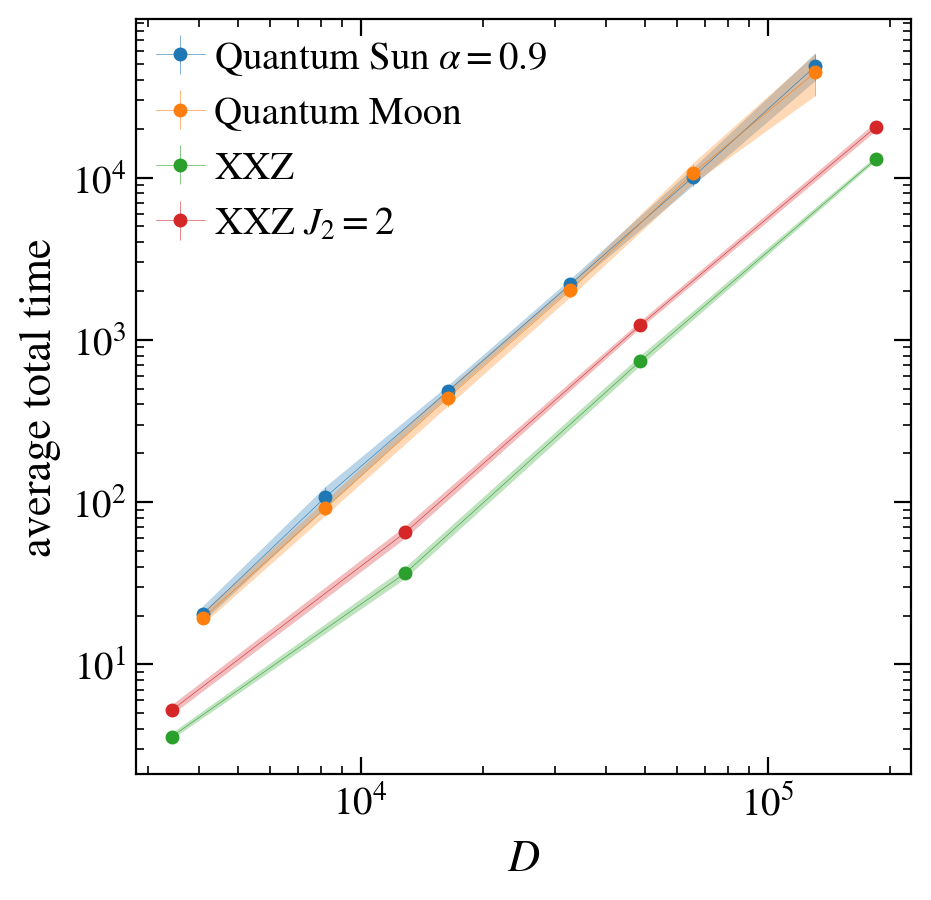

In [19]:

sizes_grain = np.arange(12, 18, 1)
times_QSun      = np.array( [ 20.451, 107.328, 482.603, 2201.19, 10075.1, 48729.1 ])
times_QSun_var  = np.array( [ 2.23543, 16.1788, 36.5048, 149.986, 1241, 9411.4 ])

times_QMoon     = np.array( [  19.262, 91.6943, 440.405, 2024.69, 10625.8, 44603.1] )
times_QMoon_var = np.array( [ 1.72124, 9.71429, 53.4474, 202.163, 1533.76, 12837.3] )

sizes_XXZ = np.arange(14, 22, 2)
times_XXZ           = np.array( [ 3.58313, 36.4853, 739.131, 13028.1 ] )
times_XXZ_var       = np.array( [ 0.157723, 2.90627, 52.3213, 440.902 ] )
times_XXZ_nn        = np.array( [ 5.21529, 64.9948, 1229.99, 20584] )
times_XXZ_nn_var    = np.array( [ 0.362352, 5.57702, 60.2604, 1260.34 ] )

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5, 5), dpi = 200)

axis.errorbar(2**sizes_grain, times_QSun, yerr=times_QSun_var, label=r"Quantum Sun $\alpha=0.9$", marker='o', markersize=4, lw=0.2)
axis.fill_between(2**sizes_grain, times_QSun - times_QSun_var, times_QSun + times_QSun_var, alpha = 0.3)
axis.errorbar(2**sizes_grain, times_QMoon, yerr=times_QMoon_var, label="Quantum Moon", marker='o', markersize=4, lw=0.2)
axis.fill_between(2**sizes_grain, times_QMoon - times_QMoon_var, times_QMoon + times_QMoon_var, alpha = 0.3)

axis.errorbar(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ, yerr=times_XXZ_var, label=r"XXZ", marker='o', markersize=4, lw=0.2)
axis.fill_between(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ - times_XXZ_var, times_XXZ + times_XXZ_var, alpha = 0.3)
axis.errorbar(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ_nn, yerr=times_XXZ_nn_var, label=r"XXZ $J_2=2$", marker='o', markersize=4, lw=0.2)
axis.fill_between(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ_nn - times_XXZ_nn_var, times_XXZ_nn + times_XXZ_nn_var, alpha = 0.3)

fig_help.set_plot_elements(axis, ylabel=r"average total time", xlabel=r"$D$", font_size=14, set_legend=False, xscale='log', yscale='log')
fig_help.set_legend(axis, fontsize=14, loc='upper left')

plt.savefig("Compare_single_thread.pdf", bbox_inches = 'tight', pad_inches=0.02)

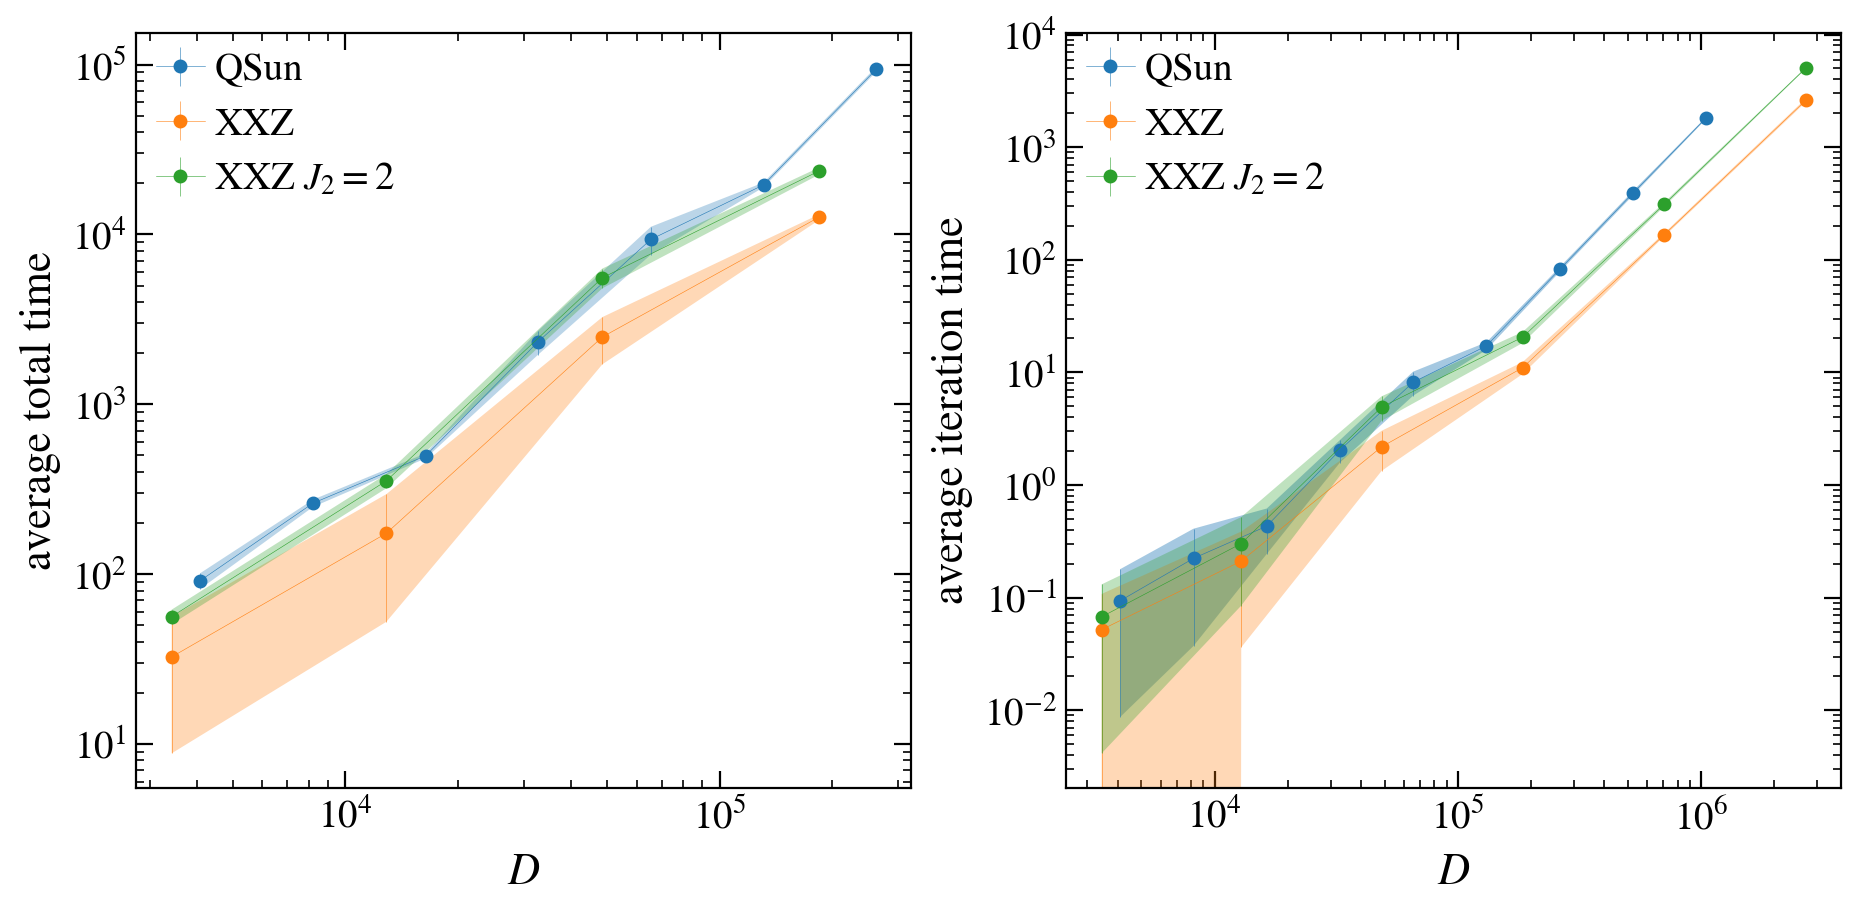

In [11]:

fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(11, 5), dpi = 200)

axis = axes[0]
sizes_grain = np.arange(12, 19, 1)
times_QSun      = np.array( [ 91.6942, 261.653, 497.3, 2339.35, 9352.99, 19584.9, 93762.3 ])
times_QSun_var  = np.array( [ 9.73604, 12.9573, 16.9143, 376.962, 1743.04, 641.603, 3063.33 ])

times_QMoon     = np.array( [  19.262, 91.6943, 440.405, 2024.69, 10625.8, 44603.1] )
times_QMoon_var = np.array( [ 1.72124, 9.71429, 53.4474, 202.163, 1533.76, 12837.3] )

sizes_XXZ = np.arange(14, 22, 2)
times_XXZ           = np.array( [ 32.5352, 174.124, 2490.52, 12666.6 ] )
times_XXZ_var       = np.array( [ 23.7291, 121.692, 770.473, 477.196 ] )
times_XXZ_nn        = np.array( [ 56.2538, 354.281, 5560.23, 23683.6 ] )
times_XXZ_nn_var    = np.array( [ 5.51814, 33.8349, 739.369, 1132.74 ] )


axis.errorbar(2**sizes_grain, times_QSun, yerr=times_QSun_var, label=r"QSun", marker='o', markersize=4, lw=0.2)
axis.fill_between(2**sizes_grain, times_QSun - times_QSun_var, times_QSun + times_QSun_var, alpha = 0.3)
# axis.errorbar(2**sizes_grain, times_QMoon, yerr=times_QMoon_var, label=r"QMoon", marker='o', markersize=4, lw=0.2)
# axis.fill_between(2**sizes_grain, times_QMoon - times_QMoon_var, times_QMoon + times_QMoon_var, alpha = 0.3)

axis.errorbar(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ, yerr=times_XXZ_var, label=r"XXZ", marker='o', markersize=4, lw=0.2)
axis.fill_between(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ - times_XXZ_var, times_XXZ + times_XXZ_var, alpha = 0.3)
axis.errorbar(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ_nn, yerr=times_XXZ_nn_var, label=r"XXZ $J_2=2$", marker='o', markersize=4, lw=0.2)
axis.fill_between(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ_nn - times_XXZ_nn_var, times_XXZ_nn + times_XXZ_nn_var, alpha = 0.3)

fig_help.set_plot_elements(axis, ylabel=r"average total time", xlabel=r"$D$", font_size=14, set_legend=False, xscale='log', yscale='log')
fig_help.set_legend(axis, fontsize=14, loc='upper left')


sizes_grain = np.arange(12, 21, 1)
times_QSun      = np.array( [ 0.0939773, 0.223298, 0.431344, 2.04622, 8.18669, 17.1836, 81.9903, 389.666, 1815.31 ])
times_QSun_var  = np.array( [ 0.0852462, 0.18605, 0.187025, 0.462439, 1.97041, 1.32443, 3.96593, 17.2965, 37.7481 ])

times_QMoon     = np.array( [ 0.250668, 1.19971, 5.73957, 26.7205, 140.874, 587.215] )
times_QMoon_var = np.array( [ 0.0541971, 0.265406, 0.811905, 4.148, 49.346, 185.522] )

sizes_XXZ = np.arange(14, 26, 2)
times_XXZ           = np.array( [ 0.0519325, 0.21117, 2.18369, 11.0212, 166.883, 2624.05 ] )
times_XXZ_var       = np.array( [ 0.055857, 0.174954, 0.847592, 1.33865, 5.6824, 93.7508] )
times_XXZ_nn        = np.array( [ 0.0675801, 0.302341, 4.92592, 20.5688, 310.065, 5070.34] )
times_XXZ_nn_var    = np.array( [ 0.0634375, 0.217402, 1.20828, 2.31962, 12.6416, 78.3705 ] )


axis = axes[1]
axis.errorbar(2**sizes_grain, times_QSun, yerr=times_QSun_var, label=r"QSun", marker='o', markersize=4, lw=0.2)
axis.fill_between(2**sizes_grain, times_QSun - times_QSun_var, times_QSun + times_QSun_var, alpha = 0.4)
# axis.errorbar(2**sizes_grain, times_QMoon, yerr=times_QMoon_var, label="QMoon", marker='o', markersize=4, lw=0.2)
# axis.fill_between(2**sizes_grain, times_QMoon - times_QMoon_var, times_QMoon + times_QMoon_var, alpha = 0.3)


# col='blue'
# sizes_grain = np.arange(17, 20, 1)
# times_QSun      = np.array( [ 271.272, 1070.48, 23605  ])
# times_QSun_var  = np.array( [ 114.004, 188.832, 1632.42 ])
# axis.errorbar(2**sizes_grain, times_QSun, yerr=times_QSun_var, label=r"QSun $\alpha=0.9$ $N_{ev}=500$", marker='o', markersize=4, lw=0.2, color=col, markerfacecolor='None')
# axis.fill_between(2**sizes_grain, times_QSun - times_QSun_var, times_QSun + times_QSun_var, alpha = 0.1, color=col)

axis.errorbar(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ, yerr=times_XXZ_var, label=r"XXZ", marker='o', markersize=4, lw=0.2)
axis.fill_between(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ - times_XXZ_var, times_XXZ + times_XXZ_var, alpha = 0.3)
axis.errorbar(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ_nn, yerr=times_XXZ_nn_var, label=r"XXZ $J_2=2$", marker='o', markersize=4, lw=0.2)
axis.fill_between(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ_nn - times_XXZ_nn_var, times_XXZ_nn + times_XXZ_nn_var, alpha = 0.3)

fig_help.set_plot_elements(axis, ylabel=r"average iteration time", xlabel=r"$D$", font_size=14, set_legend=False, xscale='log', yscale='log')
fig_help.set_legend(axis, fontsize=14, loc='upper left')

plt.savefig("Compare_iteration_single_thread.pdf", bbox_inches = 'tight', pad_inches=0.02)

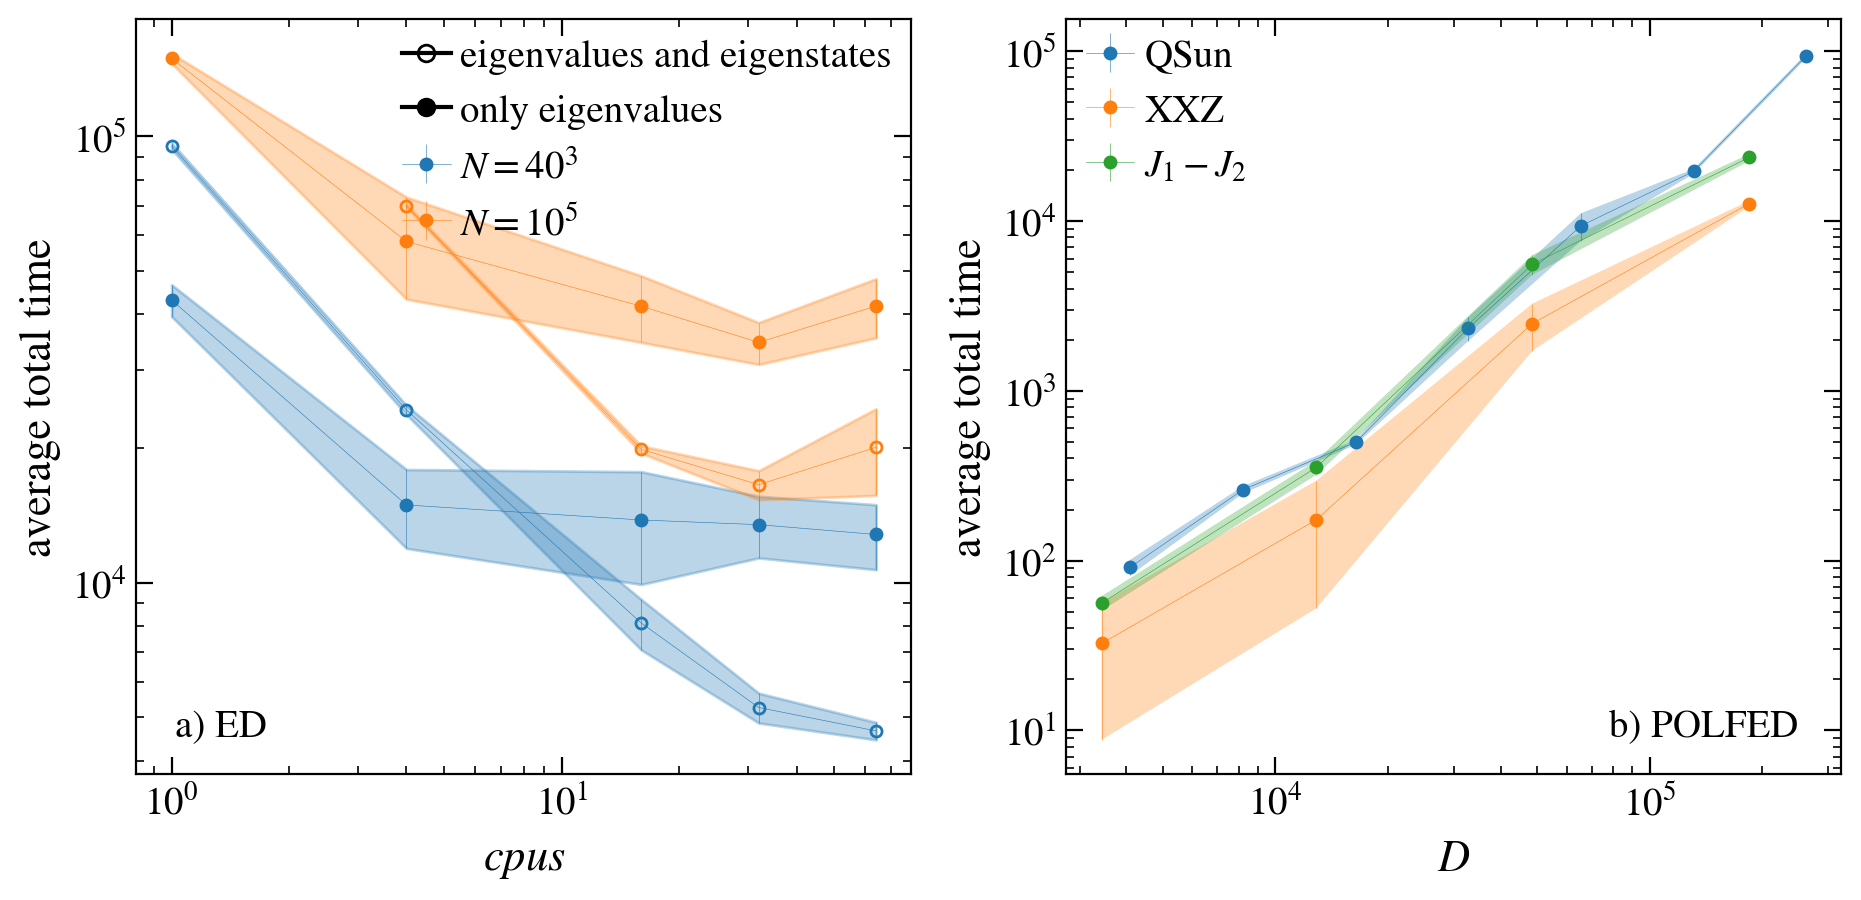

In [65]:
colors_ls_cyc = itertools.cycle(colors_ls)

fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(11, 5), dpi = 200)

axis = axes[1]
sizes_grain = np.arange(12, 19, 1)
times_QSun      = np.array( [ 91.6942, 261.653, 497.3, 2339.35, 9352.99, 19584.9, 93762.3 ])
times_QSun_var  = np.array( [ 9.73604, 12.9573, 16.9143, 376.962, 1743.04, 641.603, 3063.33 ])

times_QMoon     = np.array( [  19.262, 91.6943, 440.405, 2024.69, 10625.8, 44603.1] )
times_QMoon_var = np.array( [ 1.72124, 9.71429, 53.4474, 202.163, 1533.76, 12837.3] )

sizes_XXZ = np.arange(14, 22, 2)
times_XXZ           = np.array( [ 32.5352, 174.124, 2490.52, 12666.6 ] )
times_XXZ_var       = np.array( [ 23.7291, 121.692, 770.473, 477.196 ] )
times_XXZ_nn        = np.array( [ 56.2538, 354.281, 5560.23, 23683.6 ] )
times_XXZ_nn_var    = np.array( [ 5.51814, 33.8349, 739.369, 1132.74 ] )


axis.errorbar(2**sizes_grain, times_QSun, yerr=times_QSun_var, label=r"QSun", marker='o', markersize=4, lw=0.2)
axis.fill_between(2**sizes_grain, times_QSun - times_QSun_var, times_QSun + times_QSun_var, alpha = 0.3)
# axis.errorbar(2**sizes_grain, times_QMoon, yerr=times_QMoon_var, label=r"QMoon", marker='o', markersize=4, lw=0.2)
# axis.fill_between(2**sizes_grain, times_QMoon - times_QMoon_var, times_QMoon + times_QMoon_var, alpha = 0.3)

axis.errorbar(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ, yerr=times_XXZ_var, label=r"XXZ", marker='o', markersize=4, lw=0.2)
axis.fill_between(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ - times_XXZ_var, times_XXZ + times_XXZ_var, alpha = 0.3)
axis.errorbar(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ_nn, yerr=times_XXZ_nn_var, label=r"$J_1-J_2$", marker='o', markersize=4, lw=0.2)
axis.fill_between(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ_nn - times_XXZ_nn_var, times_XXZ_nn + times_XXZ_nn_var, alpha = 0.3)

fig_help.set_plot_elements(axis, ylabel=r"average total time", xlabel=r"$D$", font_size=14, set_legend=False, xscale='log', yscale='log')
fig_help.set_legend(axis, fontsize=14, loc='upper left')

axis.annotate(r"b) POLFED", fontsize=14, xy=(0.7, 0.05), xycoords='axes fraction')

axis = axes[0]
sizes=[4000, 8000, 16000, 32000, 64000, 100000]
cpus = [1, 4, 16, 32, 64]
# time_1_E  = np.array([9.758598, 2.607402, 2.433646, 2.280882, 4.960612])
# time_1_Evar  = np.array([2.464705, 16.829061, 5.370756, 1.207273, 5.532290])
# time_1_EV  = np.array([14.7904, 3.87592,2.2097, 2.86424, 5.86523])
# time_1_EVvar  = np.array([0.495958, 0.100567, 0.119865, 0.230024, 1.32135])

# time_2_E  = np.array([75.844000, 32.811920, 21.161020, 19.623680, 27.094040])
# time_2_Evar  = np.array([0.226576, 0.050345, 0.772308, 0.068361, 1.257410])
# time_2_EV  = np.array([150.535667, 45.521033, 16.725400, 15.388467, 18.361933])
# time_2_EVvar  = np.array([0.396932, 0.352787, 0.234103, 0.350322, 1.376855])


time_1_E  = np.array([660.311400, 205.912400, 171.018000, 180.170600, 227.853400])
time_1_Evar  = np.array([94.348798, 27.852962, 3.448981, 2.437728, 67.197179])
time_1_EV  = np.array([1012.903333, 288.786000, 98.817433, 94.318967, 100.580500])
time_1_EVvar  = np.array([4.395644, 15.636021, 2.666134, 2.781495, 2.41746])

time_2_E  = np.array([4943.282000, 1588.436000, 1414.732000, 1421.882000, 1484.442000])
time_2_Evar  = np.array([72.100479, 81.584542, 39.625951, 27.973542, 27.932750])
time_2_EV  = np.array([8923.726667, 2379.350000, 754.745667, 584.695000, 600.837667])
time_2_EVvar  = np.array([66.611362, 33.158368, 9.954666, 23.271587, 40.920338])

time_3_E  = np.array([43007.483333, 14948.588889, 13834.366667, 13505.822222, 12837.016667])
time_3_Evar  = np.array([3527.874976, 2999.702897, 3912.373725, 2129.562236, 2129.651965])
time_3_EV  = np.array([95137.800000, 24398.425000, 8131.777500, 5261.115000, 4663.022500])
time_3_EVvar  = np.array([1518.882188, 580.137334, 1053.855478, 403.749977, 210.195641])

time_4_E  = np.array([149441.500000, 58152.300000, 41642.850000, 34568.042857, 41695.885714])
time_4_Evar  = np.array([3819.461906, 14958.857485, 7082.591823, 3723.642360, 6309.392677])
time_4_EV  = np.array([np.nan, 69884.050000, 19902.575000, 16596.375000, 20128.450000])
time_4_EVvar  = np.array([np.nan, 495.270615, 374.563395, 1244.002475, 4429.418021])


axis.plot(np.nan, np.nan, marker='o', color='black', markerfacecolor='None', label='eigenvalues and eigenstates')
axis.plot(np.nan, np.nan, marker='o', color='black', label='only eigenvalues')

colors_ls_cyc = itertools.cycle(colors_ls)
# col=next(colors_ls_cyc)
# axis.errorbar(cpus, time_1_E, yerr=time_1_Evar, label=r"$N=16000$", marker='o', color=col, markersize=4, lw=0.2)
# axis.fill_between(cpus, time_1_E - time_1_Evar, time_1_E + time_1_Evar, alpha = 0.3, color=col)
# col=next(colors_ls_cyc)
# axis.errorbar(cpus, time_2_E, yerr=time_2_Evar, label=r"$N=32000$", marker='o', color=col, markersize=4, lw=0.2)
# axis.fill_between(cpus, time_2_E - time_2_Evar, time_2_E + time_2_Evar, alpha = 0.3, color=col)
col=next(colors_ls_cyc)
axis.errorbar(cpus, time_3_E, yerr=time_3_Evar, label=r"$N=40^3$", marker='o', color=col, markersize=4, lw=0.2)
axis.fill_between(cpus, time_3_E - time_3_Evar, time_3_E + time_3_Evar, alpha = 0.3, color=col)
col=next(colors_ls_cyc)
axis.errorbar(cpus, time_4_E, yerr=time_4_Evar, label=r"$N=10^5$", marker='o', color=col, markersize=4, lw=0.2)
axis.fill_between(cpus, time_4_E - time_4_Evar, time_4_E + time_4_Evar, alpha = 0.3, color=col)

# dim = 2**12; axis.plot(cpus, time_L12_E[0] / time_L12_E[:-2]/dim**0, label=r"N=%d"%(dim), marker='o', color=next(colors_ls_cyc), markersize=8, lw=1)
# dim = 2**14; axis.plot(cpus, time_L14_E[0] / time_L14_E[:-2]/dim**0, label=r"N=%d"%(dim), marker='o', color=next(colors_ls_cyc), markersize=8, lw=1)
# dim = 2**15; axis.plot(cpus, time_L15_E[0] / time_L15_E[:-2]/dim**0, label=r"N=%d"%(dim), marker='o', color=next(colors_ls_cyc), markersize=8, lw=1)
colors_ls_cyc = itertools.cycle(colors_ls)
# col=next(colors_ls_cyc)
# axis.errorbar(cpus, time_1_EV, yerr=time_1_EVvar, marker='o', color=col, markerfacecolor='None', markersize=4, lw=0.2)
# axis.fill_between(cpus, time_1_EV - time_1_EVvar, time_1_EV + time_1_EVvar, alpha = 0.3, color=col)
# col=next(colors_ls_cyc)
# axis.errorbar(cpus, time_2_EV, yerr=time_2_EVvar, marker='o', color=col, markerfacecolor='None', markersize=4, lw=0.2)
# axis.fill_between(cpus, time_2_EV - time_2_EVvar, time_2_EV + time_2_EVvar, alpha = 0.3, color=col)
col=next(colors_ls_cyc)
axis.errorbar(cpus, time_3_EV, yerr=time_3_EVvar, marker='o', color=col, markerfacecolor='None', markersize=4, lw=0.2)
axis.fill_between(cpus, time_3_EV - time_3_EVvar, time_3_EV + time_3_EVvar, alpha = 0.3, color=col)
col=next(colors_ls_cyc)
axis.errorbar(cpus, time_4_EV, yerr=time_4_EVvar, marker='o', color=col, markerfacecolor='None', markersize=4, lw=0.2)
axis.fill_between(cpus, time_4_EV - time_4_EVvar, time_4_EV + time_4_EVvar, alpha = 0.3, color=col)

# dim = 2**12; axis.plot(cpus,  time_L12_EV[0] / time_L12_EV[:-2]/dim**0, marker='o', color=next(colors_ls_cyc), markerfacecolor='None', markersize=8, lw=1)
# dim = 2**14; axis.plot(cpus,  time_L14_EV[0] / time_L14_EV[:-2]/dim**0, marker='o', color=next(colors_ls_cyc), markerfacecolor='None', markersize=8, lw=1)
# dim = 2**15; axis.plot(cpus,  time_L15_EV[0] / time_L15_EV[:-2]/dim**0, marker='o', color=next(colors_ls_cyc), markerfacecolor='None', markersize=8, lw=1)
axis.annotate(r"a) ED", fontsize=14, xy=(0.05, 0.05), xycoords='axes fraction')

fig_help.set_plot_elements(axis, ylabel=r"average total time", xlabel=r"$cpus$", font_size=14, set_legend=False, xscale='log', yscale='log')
fig_help.set_legend(axis, fontsize=14, loc='upper right')

plt.savefig("Benchmark_ED_POLFED.pdf", bbox_inches = 'tight', pad_inches=0.02)

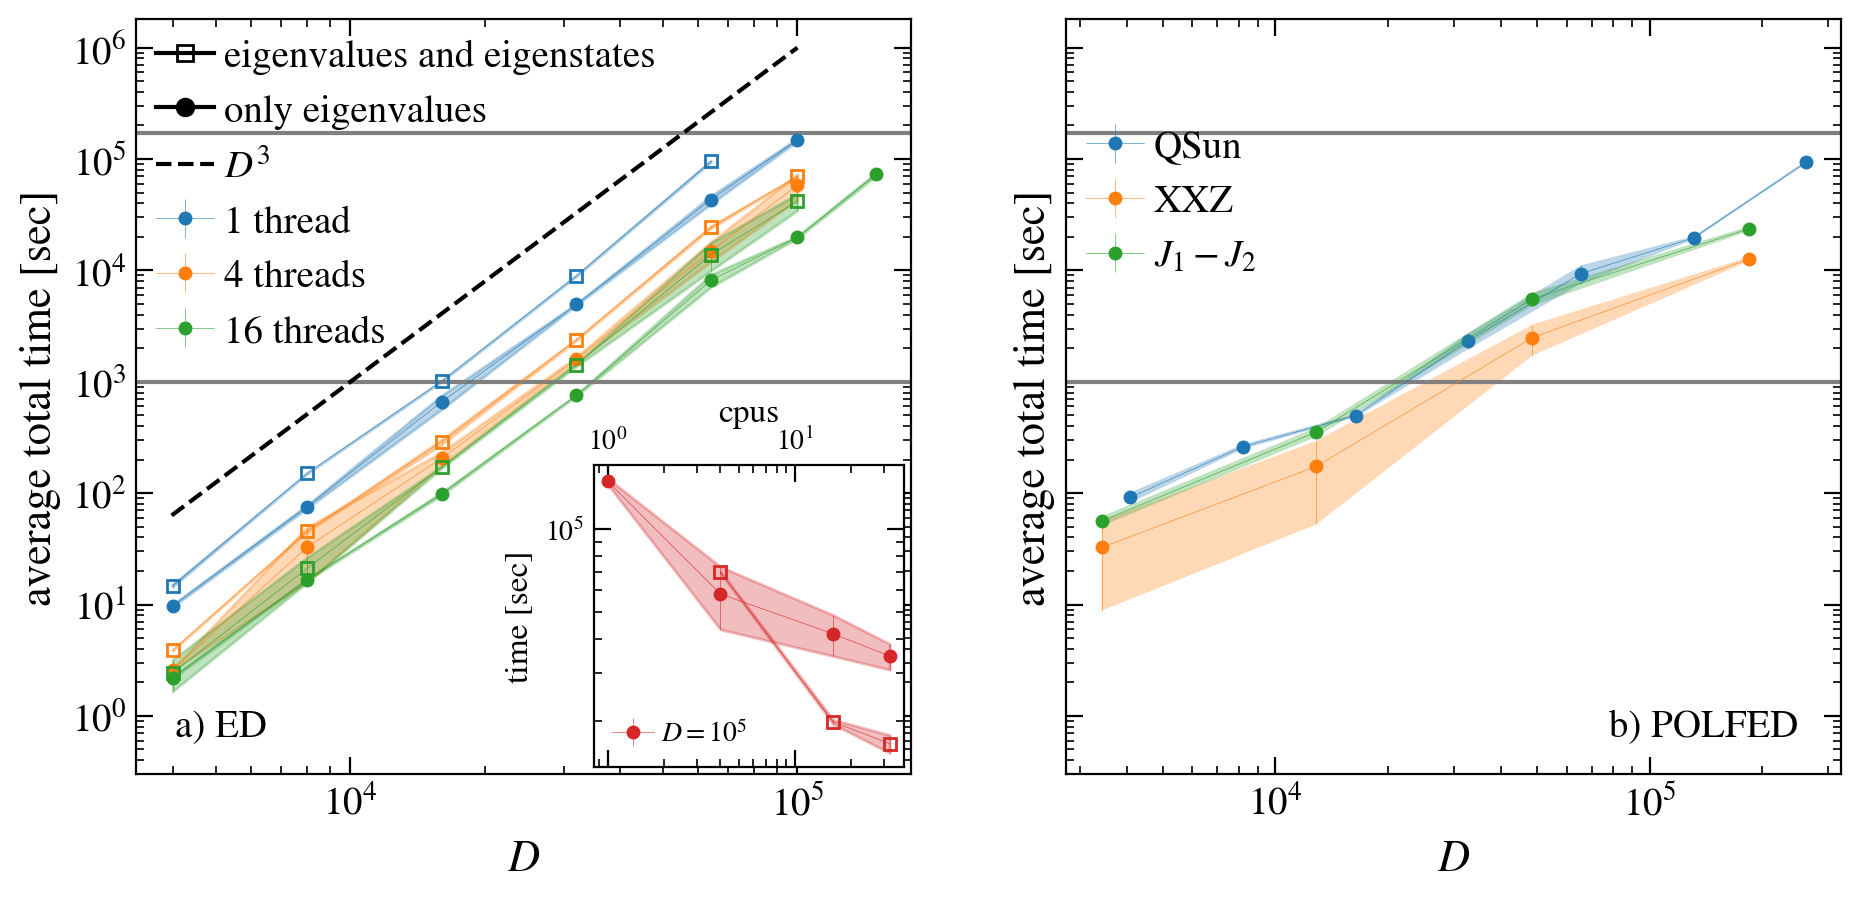

In [4]:
colors_ls_cyc = itertools.cycle(colors_ls)

fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(11, 5), dpi = 200, sharey=True)

axes[0].axhline(y=1e3, ls='-', c='gray')
axes[1].axhline(y=1e3, ls='-', c='gray')

axis = axes[1]
sizes_grain = np.arange(12, 19, 1)
times_QSun      = np.array( [ 91.6942, 261.653, 497.3, 2339.35, 9352.99, 19584.9, 93762.3 ])
times_QSun_var  = np.array( [ 9.73604, 12.9573, 16.9143, 376.962, 1743.04, 641.603, 3063.33 ])

times_QMoon     = np.array( [  19.262, 91.6943, 440.405, 2024.69, 10625.8, 44603.1] )
times_QMoon_var = np.array( [ 1.72124, 9.71429, 53.4474, 202.163, 1533.76, 12837.3] )

sizes_XXZ = np.arange(14, 22, 2)
times_XXZ           = np.array( [ 32.5352, 174.124, 2490.52, 12666.6 ] )
times_XXZ_var       = np.array( [ 23.7291, 121.692, 770.473, 477.196 ] )
times_XXZ_nn        = np.array( [ 56.2538, 354.281, 5560.23, 23683.6 ] )
times_XXZ_nn_var    = np.array( [ 5.51814, 33.8349, 739.369, 1132.74 ] )


axis.errorbar(2**sizes_grain, times_QSun, yerr=times_QSun_var, label=r"QSun", marker='o', markersize=4, lw=0.2)
axis.fill_between(2**sizes_grain, times_QSun - times_QSun_var, times_QSun + times_QSun_var, alpha = 0.3)
# axis.errorbar(2**sizes_grain, times_QMoon, yerr=times_QMoon_var, label=r"QMoon", marker='o', markersize=4, lw=0.2)
# axis.fill_between(2**sizes_grain, times_QMoon - times_QMoon_var, times_QMoon + times_QMoon_var, alpha = 0.3)

axis.errorbar(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ, yerr=times_XXZ_var, label=r"XXZ", marker='o', markersize=4, lw=0.2)
axis.fill_between(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ - times_XXZ_var, times_XXZ + times_XXZ_var, alpha = 0.3)
axis.errorbar(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ_nn, yerr=times_XXZ_nn_var, label=r"$J_1-J_2$", marker='o', markersize=4, lw=0.2)
axis.fill_between(binom(sizes_XXZ, sizes_XXZ/2), times_XXZ_nn - times_XXZ_nn_var, times_XXZ_nn + times_XXZ_nn_var, alpha = 0.3)

fig_help.set_plot_elements(axis, ylabel=r"average total time [sec]", xlabel=r"$D$", font_size=14, set_legend=False, xscale='log', yscale='log')
fig_help.set_legend(axis, fontsize=14, loc='upper left', anchor=(-0.02, 0.9))

axis.annotate(r"b) POLFED", fontsize=14, xy=(0.7, 0.05), xycoords='axes fraction')
axis.axhline(y=48 * 3600, ls='-', c='gray')

axis = axes[0]
sizes=[4000, 8000, 16000, 32000, 64000, 100000, 150000]

cpus = [1, 4, 16, 32, 64]
# time_1_E  = np.array([9.758598, 2.607402, 2.433646, 2.280882, 4.960612])
# time_1_Evar  = np.array([2.464705, 16.829061, 5.370756, 1.207273, 5.532290])
# time_1_EV  = np.array([14.7904, 3.87592,2.2097, 2.86424, 5.86523])
# time_1_EVvar  = np.array([0.495958, 0.100567, 0.119865, 0.230024, 1.32135])

# time_2_E  = np.array([75.844000, 32.811920, 21.161020, 19.623680, 27.094040])
# time_2_Evar  = np.array([0.226576, 0.050345, 0.772308, 0.068361, 1.257410])
# time_2_EV  = np.array([150.535667, 45.521033, 16.725400, 15.388467, 18.361933])
# time_2_EVvar  = np.array([0.396932, 0.352787, 0.234103, 0.350322, 1.376855])


time_1_E  = np.array([9.758598, 75.844000, 660.311400, 4943.282000, 43007.483333, 149441.500000, np.nan])
time_1_Evar  = np.array([0.226576, 2.464705, 94.348798, 72.100479, 3527.874976, 3819.461906, np.nan])
time_1_EV  = np.array([14.790400, 150.535667, 1012.903333, 8923.726667, 95137.800000, np.nan, np.nan])
time_1_EVvar  = np.array([0.356547, 0.396932, 4.395644, 66.611362, 1518.882188, np.nan, np.nan])

time_2_E  = np.array([2.607402, 32.811920, 205.912400, 1588.436000, 14948.588889, 58152.300000, np.nan])
time_2_Evar  = np.array([0.050345, 16.829061, 27.852962, 81.584542, 2999.702897, 14958.857485, np.nan])
time_2_EV  = np.array([3.875920, 45.521033, 288.786000, 2379.350000, 24398.425000, 69884.050000, np.nan])
time_2_EVvar  = np.array([0.027991, 0.352787, 15.636021, 33.158368, 580.137334, 495.270615, np.nan])

time_3_E  = np.array([2.209703, 16.725400, 98.817433, 754.745667, 8131.777500, 19902.575000, 73167.466667])
time_3_Evar  = np.array([0.038627, 0.234103, 2.666134, 9.954666, 1053.855478, 374.563395, 2436.082161])
time_3_EV  = np.array([2.433646, 21.161020, 171.018000, 1414.732000, 13834.366667, 41642.850000, np.nan])
time_3_EVvar  = np.array([0.772308, 5.370756, 3.448981, 39.625951, 3912.373725, 7082.591823, np.nan])

time_4_E  = np.array([2.864240, 15.388467, 94.318967, 584.695000, 5261.115000, 16596.375000, 51442.333333])
time_4_Evar  = np.array([0.117391, 0.350322, 2.781495, 23.271587, 403.749977, 1244.002475, 3504.526411])
time_4_EV  = np.array([2.280882, 19.623680, 180.170600, 1421.882000, 13505.822222, 34568.042857, np.nan])
time_4_EVvar  = np.array([0.068361, 1.207273, 2.437728, 27.973542, 2129.562236, 3723.642360, np.nan])


axis.plot(np.nan, np.nan, marker='s', color='black', markerfacecolor='None', label='eigenvalues and eigenstates')
axis.plot(np.nan, np.nan, marker='o', color='black', label='only eigenvalues')

colors_ls_cyc = itertools.cycle(colors_ls)
col=next(colors_ls_cyc)
axis.errorbar(sizes, time_1_E, yerr=time_1_Evar, label=r"1 thread", marker='o', color=col, markersize=4, lw=0.2)
axis.fill_between(sizes, time_1_E - time_1_Evar, time_1_E + time_1_Evar, alpha = 0.3, color=col)
col=next(colors_ls_cyc)
axis.errorbar(sizes, time_2_E, yerr=time_2_Evar, label=r"4 threads", marker='o', color=col, markersize=4, lw=0.2)
axis.fill_between(sizes, time_2_E - time_2_Evar, time_2_E + time_2_Evar, alpha = 0.3, color=col)

col=next(colors_ls_cyc)
axis.errorbar(sizes, time_3_E, yerr=time_3_Evar, label=r"16 threads", marker='o', color=col, markersize=4, lw=0.2)
axis.fill_between(sizes, time_3_E - time_3_Evar, time_3_E + time_3_Evar, alpha = 0.3, color=col)
# col=next(colors_ls_cyc)
# axis.errorbar(sizes, time_4_E, yerr=time_4_Evar, label=r"32 threads", marker='o', color=col, markersize=4, lw=0.2)
# axis.fill_between(sizes, time_4_E - time_4_Evar, time_4_E + time_4_Evar, alpha = 0.3, color=col)

# dim = 2**12; axis.plot(cpus, time_L12_E[0] / time_L12_E[:-2]/dim**0, label=r"N=%d"%(dim), marker='o', color=next(colors_ls_cyc), markersize=8, lw=1)
# dim = 2**14; axis.plot(cpus, time_L14_E[0] / time_L14_E[:-2]/dim**0, label=r"N=%d"%(dim), marker='o', color=next(colors_ls_cyc), markersize=8, lw=1)
# dim = 2**15; axis.plot(cpus, time_L15_E[0] / time_L15_E[:-2]/dim**0, label=r"N=%d"%(dim), marker='o', color=next(colors_ls_cyc), markersize=8, lw=1)
colors_ls_cyc = itertools.cycle(colors_ls)
col=next(colors_ls_cyc)
axis.errorbar(sizes, time_1_EV, yerr=time_1_EVvar, marker='s', color=col, markerfacecolor='None', markersize=4, lw=0.2)
axis.fill_between(sizes, time_1_EV - time_1_EVvar, time_1_EV + time_1_EVvar, alpha = 0.3, color=col)
col=next(colors_ls_cyc)
axis.errorbar(sizes, time_2_EV, yerr=time_2_EVvar, marker='s', color=col, markerfacecolor='None', markersize=4, lw=0.2)
axis.fill_between(sizes, time_2_EV - time_2_EVvar, time_2_EV + time_2_EVvar, alpha = 0.3, color=col)
col=next(colors_ls_cyc)
axis.errorbar(sizes, time_3_EV, yerr=time_3_EVvar, marker='s', color=col, markerfacecolor='None', markersize=4, lw=0.2)
axis.fill_between(sizes, time_3_EV - time_3_EVvar, time_3_EV + time_3_EVvar, alpha = 0.3, color=col)
# col=next(colors_ls_cyc)
# axis.errorbar(sizes, time_4_EV, yerr=time_4_EVvar, marker='o', color=col, markerfacecolor='None', markersize=4, lw=0.2)
# axis.fill_between(sizes, time_4_EV - time_4_EVvar, time_4_EV + time_4_EVvar, alpha = 0.3, color=col)

# dim = 2**12; axis.plot(cpus,  time_L12_EV[0] / time_L12_EV[:-2]/dim**0, marker='o', color=next(colors_ls_cyc), markerfacecolor='None', markersize=8, lw=1)
# dim = 2**14; axis.plot(cpus,  time_L14_EV[0] / time_L14_EV[:-2]/dim**0, marker='o', color=next(colors_ls_cyc), markerfacecolor='None', markersize=8, lw=1)
# dim = 2**15; axis.plot(cpus,  time_L15_EV[0] / time_L15_EV[:-2]/dim**0, marker='o', color=next(colors_ls_cyc), markerfacecolor='None', markersize=8, lw=1)
axis.annotate(r"a) ED", fontsize=14, xy=(0.05, 0.05), xycoords='axes fraction')
axis.axhline(y=48 * 3600, ls='-', c='gray')
axis.set_ylim(3e-1, 1.8e6)

dims = np.logspace(3.6, 5, 100)
axis.plot(dims, (dims/1000)**3, ls='--', c='k', label=r"$D^3$")
fig_help.set_plot_elements(axis, ylabel=r"average total time [sec]", xlabel=r"$D$", font_size=14, set_legend=False, xscale='log', yscale='log')
fig_help.set_legend(axis, fontsize=14, loc='upper left')

inset = axis.inset_axes([0.59, 0.01, 0.4, 0.4])
inset.xaxis.set_label_position("top")
inset.xaxis.tick_top()
cpus = [1, 4, 16, 32]
time_E  = np.array([149441.500000, 58152.300000, 41642.850000, 34568.042857])
time_Evar  = np.array([3819.461906, 14958.857485, 7082.591823, 3723.642360])
time_EV  = np.array([np.nan, 69884.050000, 19902.575000, 16596.375000])
time_EVvar  = np.array([np.nan, 495.270615, 374.563395, 1244.002475])

# colors_ls_cyc = itertools.cycle(colors_ls)
col=next(colors_ls_cyc)
inset.errorbar(cpus, time_E, yerr=time_Evar, marker='o', color=col, markersize=4, lw=0.2, label=r"$D=10^5$")
inset.fill_between(cpus, time_E - time_Evar, time_E + time_Evar, alpha = 0.3, color=col)
inset.errorbar(cpus, time_EV, yerr=time_EVvar, marker='s', color=col, markerfacecolor='None', markersize=4, lw=0.2)
inset.fill_between(cpus, time_EV - time_EVvar, time_EV + time_EVvar, alpha = 0.3, color=col)
fig_help.set_plot_elements(inset, ylabel=r"time [sec]", xlabel=r"cpus", font_size=10, set_legend=False, xscale='log', yscale='log')
fig_help.set_legend(inset, fontsize=10, loc='lower left')

plt.savefig("Benchmark_ED_POLFED.pdf", bbox_inches = 'tight', pad_inches=0.02)

In [62]:
48 * 3600

172800